In [1]:
import pandas as pd
import numpy as np

def load_csv(route):
    data = pd.read_csv(route)
    data = data[data.columns[1:]]
    data["Time stamp"] = data["Time stamp"].astype(int)
    data = data.set_index(data["File name"] + data["Time stamp"].astype(str))
    return data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [3]:
den_train = load_csv("/Users/harmonialeo/Downloads/density_train.csv")
den_val = load_csv("/Users/harmonialeo/Downloads/density_val.csv")
den_test = load_csv("/Users/harmonialeo/Downloads/density_test.csv")

In [4]:
den_all = den_train.append(den_val).append(den_test)

No handles with labels found to put in legend.


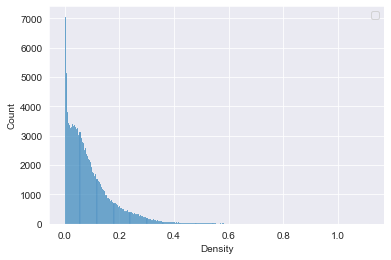

In [5]:
sns.histplot(den_all["Density"])
plt.legend()

In [8]:
den_train_boxes = np.load("/Users/harmonialeo/Downloads/density_boxes_train.npz")
den_val_boxes = np.load("/Users/harmonialeo/Downloads/density_boxes_val.npz")
den_test_boxes = np.load("/Users/harmonialeo/Downloads/density_boxes_test.npz")

In [10]:
den_all_boxes = np.concatenate([den_train_boxes["Density"],den_val_boxes["Density"],den_test_boxes["Density"]])

No handles with labels found to put in legend.


(0.18881905343969435, 0.29949252738161414)

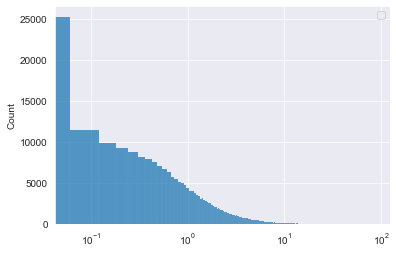

In [25]:
sns.histplot(den_all_boxes)
plt.legend()
plt.xscale("log")
den_all_boxes.mean(),den_all_boxes.std()

No handles with labels found to put in legend.


(0.20971860761607616, 0.34043720974543457)

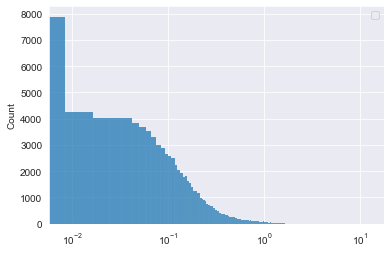

In [21]:
den_small_boxes = np.concatenate([den_train_boxes["Density_small"],den_val_boxes["Density_small"],den_test_boxes["Density_small"]])
sns.histplot(den_small_boxes)
plt.legend()
plt.xscale("log")
den_small_boxes.mean(),den_small_boxes.std()

No handles with labels found to put in legend.


(0.1801785326083984, 0.2623661962992857)

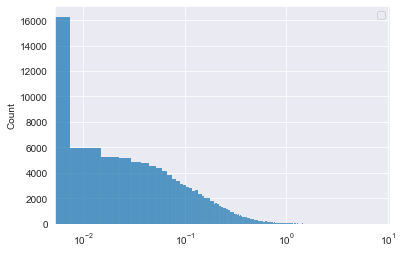

In [22]:
den_medium_boxes = np.concatenate([den_train_boxes["Density_medium"],den_val_boxes["Density_medium"],den_test_boxes["Density_medium"]])
sns.histplot(den_medium_boxes)
plt.legend()
plt.xscale("log")
den_medium_boxes.mean(),den_medium_boxes.std()

No handles with labels found to put in legend.


(0.08747817619680512, 0.16210161662001396)

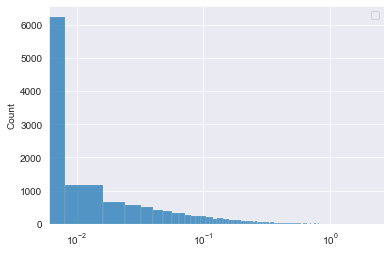

In [23]:
den_large_boxes = np.concatenate([den_train_boxes["Density_large"],den_val_boxes["Density_large"],den_test_boxes["Density_large"]])
sns.histplot(den_large_boxes)
plt.legend()
plt.xscale("log")
den_large_boxes.mean(),den_large_boxes.std()

No handles with labels found to put in legend.


(0.1621989749087694, 0.2226080876133843)

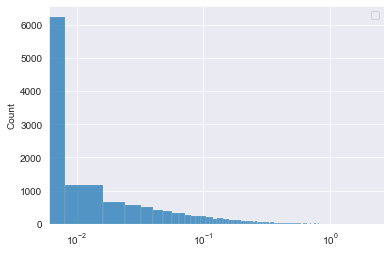

In [26]:
den_car_boxes = np.concatenate([den_train_boxes["Density_car"],den_val_boxes["Density_car"],den_test_boxes["Density_car"]])
sns.histplot(den_large_boxes)
plt.legend()
plt.xscale("log")
den_car_boxes.mean(),den_car_boxes.std()

No handles with labels found to put in legend.


(0.38324955708657193, 0.5806051654584077)

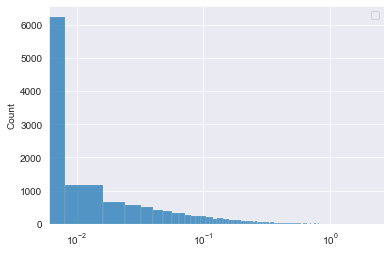

In [27]:
den_per_boxes = np.concatenate([den_train_boxes["Density_per"],den_val_boxes["Density_per"],den_test_boxes["Density_per"]])
sns.histplot(den_large_boxes)
plt.legend()
plt.xscale("log")
den_per_boxes.mean(),den_per_boxes.std()

In [24]:
[den_all_boxes["Density"].quantile(0.05*i) for i in range(21)]

[0.0,
 0.015527950310559,
 0.0625,
 0.131578947368421,
 0.2111111111111111,
 0.2983870967741935,
 0.3943661971830985,
 0.5,
 0.6111111111111112,
 0.7417582417582418,
 0.890625,
 1.0638297872340423,
 1.2682926829268293,
 1.515669993455499,
 1.8227848101265824,
 2.2222222222222223,
 2.76,
 3.521615809357746,
 4.719729907773388,
 7.039240533562822,
 85.41071428571429]

In [52]:
basic = load_csv("/Users/harmonialeo/Downloads/basic/summarise.csv")
taf_minmax = load_csv("/Users/harmonialeo/Downloads/taf_se_minmax/summarise.csv")
taf_quantiled = load_csv("/Users/harmonialeo/Downloads/taf_se_quantiled/summarise.csv")

In [53]:
basic.head()

,Exp name,File name,Time stamp,Map,Map 50,Map 75,Map small,Map medium,Map large,Infer time
17-10-06_13-18-33_244500000_304500000749999,basic_newlr,17-10-06_13-18-33_244500000_304500000,749999,0.966337,1.0,1.0,0.9,1.000000,1.0,2.470572
17-10-06_13-18-33_244500000_3045000001749999,basic_newlr,17-10-06_13-18-33_244500000_304500000,1749999,0.822772,1.0,1.0,-1.0,0.822772,-1.0,0.012110
17-10-06_13-18-33_244500000_3045000002749999,basic_newlr,17-10-06_13-18-33_244500000_304500000,2749999,0.800000,1.0,1.0,0.8,-1.000000,-1.0,0.009104
17-10-06_13-18-33_244500000_3045000003749999,basic_newlr,17-10-06_13-18-33_244500000_304500000,3749999,0.000000,0.0,0.0,0.0,-1.000000,-1.0,0.008955
17-10-06_13-18-33_244500000_3045000004749999,basic_newlr,17-10-06_13-18-33_244500000_304500000,4749999,0.850495,1.0,1.0,0.8,0.900000,-1.0,0.008486


In [54]:
test_result = basic.merge(taf_minmax["Map"],left_index=True,right_index=True).merge(taf_quantiled["Map"],left_index=True,right_index=True).merge(den_test,left_index=True,right_index=True)

In [60]:
test_result[(test_result["Smalls count"]>3)&(test_result["Larges count"]==0)&(test_result["Mediums count"]==0)&((test_result["Map"]-test_result["Map_x"])>0.2)][["File name_x","Time stamp_x","Map_x","Map_y","Map"]]

,File name_x,Time stamp_x,Map_x,Map_y,Map
17-08-23_17-50-46_793500000_85350000012599999,17-08-23_17-50-46_793500000_853500000,12599999,0.250495,0.200495,0.616337
17-08-23_17-50-46_244500000_3045000003099999,17-08-23_17-50-46_244500000_304500000,3099999,0.000000,0.417327,0.484158
17-08-23_17-50-46_1037500000_109750000012099999,17-08-23_17-50-46_1037500000_1097500000,12099999,0.189604,0.439109,0.525743
17-04-21_09-48-10_2501500000_25615000004599999,17-04-21_09-48-10_2501500000_2561500000,4599999,0.466832,0.832921,0.813861


In [61]:
test_result[(test_result["Smalls count"]==0)&(test_result["Larges count"]>0)&(test_result["Mediums count"]==0)&((test_result["Map"]-test_result["Map_x"])>0.2)][["File name_x","Time stamp_x","Map_x","Map_y","Map"]]

,File name_x,Time stamp_x,Map_x,Map_y,Map
17-04-14_14-59-17_549500000_6095000004099999,17-04-14_14-59-17_549500000_609500000,4099999,0.2,0.7,0.5
17-04-14_14-59-17_549500000_6095000005099999,17-04-14_14-59-17_549500000_609500000,5099999,0.1,0.7,0.4
17-04-14_14-59-17_549500000_6095000006099999,17-04-14_14-59-17_549500000_609500000,6099999,0.1,0.7,0.5
17-04-14_14-59-17_549500000_6095000007599999,17-04-14_14-59-17_549500000_609500000,7599999,0.5,0.7,0.8
17-04-14_14-59-17_549500000_6095000008099999,17-04-14_14-59-17_549500000_609500000,8099999,0.0,0.9,0.7
...,...,...,...,...,...
18-03-29_13-15-02_244500000_30450000013999999,18-03-29_13-15-02_244500000_304500000,13999999,0.0,0.4,0.4
18-03-29_13-15-02_244500000_30450000014249999,18-03-29_13-15-02_244500000_304500000,14249999,0.0,0.4,0.4
18-03-29_13-15-02_244500000_30450000014499999,18-03-29_13-15-02_244500000_304500000,14499999,0.0,0.4,0.5
18-03-29_13-15-02_244500000_30450000014749999,18-03-29_13-15-02_244500000_304500000,14749999,0.1,0.5,0.5


In [64]:
test_result[(test_result["Smalls count"]==0)&(test_result["Larges count"]==0)&(test_result["Mediums count"]>3)&((test_result["Map"]-test_result["Map_x"])>0.2)][["File name_x","Time stamp_x","Map_x","Map_y","Map"]]

,File name_x,Time stamp_x,Map_x,Map_y,Map
17-04-12_19-21-02_427500000_4875000001599999,17-04-12_19-21-02_427500000_487500000,1599999,0.652475,0.813861,0.881931
17-04-12_19-21-02_427500000_48750000010599999,17-04-12_19-21-02_427500000_487500000,10599999,0.430693,0.628713,0.653465
17-04-11_15-13-23_500000_605000008099999,17-04-11_15-13-23_500000_60500000,8099999,0.154455,0.480198,0.554455
17-04-14_15-29-53_500000_6050000012599999,17-04-14_15-29-53_500000_60500000,12599999,0.404950,0.702970,0.842244
17-08-24_15-42-17_122500000_1825000001099999,17-08-24_15-42-17_122500000_182500000,1099999,0.315842,0.553465,0.584406
17-08-24_15-42-17_122500000_1825000004099999,17-08-24_15-42-17_122500000_182500000,4099999,0.284158,0.443564,0.493564
17-08-24_15-42-17_122500000_1825000005099999,17-08-24_15-42-17_122500000_182500000,5099999,0.386139,0.698020,0.683168
17-08-24_15-42-17_122500000_1825000006099999,17-08-24_15-42-17_122500000_182500000,6099999,0.574752,0.861386,0.776238
17-04-21_06-54-28_1525500000_15855000001099999,17-04-21_06-54-28_1525500000_1585500000,1099999,0.554455,0.788614,0.830858
17-04-21_06-54-28_1525500000_15855000006099999,17-04-21_06-54-28_1525500000_1585500000,6099999,0.254455,0.403960,0.527723


In [68]:
test_result[(test_result["Pers count"]>2)&(test_result["Cars count"]>0)&((test_result["Map"]-test_result["Map_x"])>0.2)][["File name_x","Time stamp_x","Map_x","Map_y","Map"]]

,File name_x,Time stamp_x,Map_x,Map_y,Map
17-06-97_12-14-33_500000_6050000015599999,17-06-97_12-14-33_500000_60500000,15599999,0.250495,0.382178,0.537954
17-08-23_17-50-46_793500000_85350000012599999,17-08-23_17-50-46_793500000_853500000,12599999,0.250495,0.200495,0.616337
17-08-24_15-42-17_549500000_6095000002099999,17-08-24_15-42-17_549500000_609500000,2099999,0.119266,0.292409,0.406931
17-08-23_17-07-20_183500000_243500000599999,17-08-23_17-07-20_183500000_243500000,599999,0.272277,0.366667,0.577723
17-10-12_16-51-41_671500000_73150000012749999,17-10-12_16-51-41_671500000_731500000,12749999,0.450000,0.584653,0.723762
17-10-12_16-51-41_671500000_73150000014749999,17-10-12_16-51-41_671500000_731500000,14749999,0.191089,0.766832,0.666337
17-10-12_16-51-41_671500000_73150000015749999,17-10-12_16-51-41_671500000_731500000,15749999,0.363696,0.813861,0.651980
18-03-29_13-15-02_122500000_1825000001249999,18-03-29_13-15-02_122500000_182500000,1249999,0.549381,0.775908,0.753053
18-03-29_13-15-02_122500000_1825000002249999,18-03-29_13-15-02_122500000_182500000,2249999,0.382178,0.549505,0.628218
18-03-29_13-15-02_122500000_1825000002999999,18-03-29_13-15-02_122500000_182500000,2999999,0.411881,0.654290,0.705404


In [72]:
test_result[(test_result["Pers count"]>4)&((test_result["Map"]-test_result["Map_x"])>0)][["File name_x","Time stamp_x","Map_x","Map_y","Map"]]

,File name_x,Time stamp_x,Map_x,Map_y,Map
17-06-97_12-14-33_305500000_3655000004099999,17-06-97_12-14-33_305500000_365500000,4099999,0.427063,0.516766,0.456931
17-08-24_15-42-17_549500000_609500000599999,17-08-24_15-42-17_549500000_609500000,599999,0.468317,0.534389,0.598597
17-06-97_12-14-33_427500000_48750000010099999,17-06-97_12-14-33_427500000_487500000,10099999,0.482178,0.489604,0.644884
17-06-97_12-14-33_427500000_48750000011099999,17-06-97_12-14-33_427500000_487500000,11099999,0.578218,0.638614,0.594059
17-06-97_12-14-33_427500000_48750000012099999,17-06-97_12-14-33_427500000_487500000,12099999,0.502970,0.591584,0.538614
17-10-06_13-18-33_122500000_18250000014749999,17-10-06_13-18-33_122500000_182500000,14749999,0.664026,0.632267,0.762924
18-03-29_13-15-02_122500000_1825000003749999,18-03-29_13-15-02_122500000_182500000,3749999,0.518812,0.606436,0.585644
17-10-12_16-10-47_61500000_121500000749999,17-10-12_16-10-47_61500000_121500000,749999,0.252104,0.305116,0.319109


In [76]:
test_result[(test_result["Pers count"]>1)&(test_result["Pers count"]<4)&((test_result["Map"]-test_result["Map_x"])>0)][["File name_x","Time stamp_x","Map_x","Map_y","Map"]]

,File name_x,Time stamp_x,Map_x,Map_y,Map
17-06-97_12-14-33_244500000_304500000599999,17-06-97_12-14-33_244500000_304500000,599999,0.655941,0.658581,0.667327
17-06-97_12-14-33_244500000_3045000001099999,17-06-97_12-14-33_244500000_304500000,1099999,0.471287,0.346535,0.513614
17-10-06_13-18-33_549500000_609500000849999,17-10-06_13-18-33_549500000_609500000,849999,0.350000,0.176733,0.375248
17-10-06_13-18-33_549500000_6095000001849999,17-10-06_13-18-33_549500000_609500000,1849999,0.176733,0.151485,0.275743
17-10-06_13-18-33_549500000_6095000008849999,17-10-06_13-18-33_549500000_609500000,8849999,0.067327,0.417327,0.416832
...,...,...,...,...,...
18-03-29_13-15-02_244500000_3045000005499999,18-03-29_13-15-02_244500000_304500000,5499999,0.476733,0.625248,0.712624
18-03-29_13-15-02_244500000_3045000005749999,18-03-29_13-15-02_244500000_304500000,5749999,0.201980,0.625743,0.775743
18-03-29_13-15-02_244500000_3045000005999999,18-03-29_13-15-02_244500000_304500000,5999999,0.551980,0.675248,0.712624
18-03-29_13-15-02_244500000_30450000010749999,18-03-29_13-15-02_244500000_304500000,10749999,0.262624,0.375248,0.300495


In [86]:
test_result[(test_result["Density effective max"]>0.1)&(test_result["Density effective min"]<0.01)&(test_result["Density effective min"]>0)&(test_result["Map_x"]>0.1)&((test_result["Map"]-test_result["Map_x"])>0.2)][["File name_x","Time stamp_x","Map_x","Map_y","Map"]]

,File name_x,Time stamp_x,Map_x,Map_y,Map
17-04-12_19-21-02_427500000_4875000009099999,17-04-12_19-21-02_427500000_487500000,9099999,0.301980,0.530693,0.766337
17-04-13_15-05-43_1830500000_18905000008099999,17-04-13_15-05-43_1830500000_1890500000,8099999,0.403960,0.702970,0.628713
17-08-23_17-07-20_61500000_1215000007599999,17-08-23_17-07-20_61500000_121500000,7599999,0.269307,0.530693,0.530693
17-04-21_09-48-10_3233500000_32935000004599999,17-04-21_09-48-10_3233500000_3293500000,4599999,0.400990,0.530693,0.755446
17-04-21_06-54-28_1525500000_158550000012099999,17-04-21_06-54-28_1525500000_1585500000,12099999,0.257426,0.541089,0.504950
17-04-14_14-59-17_732500000_7925000006599999,17-04-14_14-59-17_732500000_792500000,6599999,0.201980,0.899010,0.900000
17-04-14_14-59-17_732500000_7925000007099999,17-04-14_14-59-17_732500000_792500000,7099999,0.353465,0.850495,0.800990
17-04-14_14-59-17_732500000_7925000008599999,17-04-14_14-59-17_732500000_792500000,8599999,0.353465,0.900000,0.925248
17-04-14_14-59-17_732500000_79250000011599999,17-04-14_14-59-17_732500000_792500000,11599999,0.201980,0.799010,0.799010
17-04-14_14-59-17_732500000_79250000014599999,17-04-14_14-59-17_732500000_792500000,14599999,0.201980,0.850495,0.925248


In [109]:
from scipy import stats

bins = np.arange(0, 1, 0.01)
digitize = np.digitize(test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]>=0.01)&(test_result["Exp name"]=="basic_newlr")].values, bins)
dist1 = np.array([np.sum(digitize==bin) for bin in range(len(bins))])[1:]+1e-8
dist1 = dist1/np.sum(dist1)
digitize = np.digitize(test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]==0.01)&(test_result["Exp name"]=="basic_newlr")].values, bins)
dist2 = np.array([np.sum(digitize==bin) for bin in range(len(bins))])[1:]+1e-8
dist2 = dist2/np.sum(dist2)
stats.entropy(dist1,dist2)

2.6541409319095437

<AxesSubplot:xlabel='Map', ylabel='Density'>

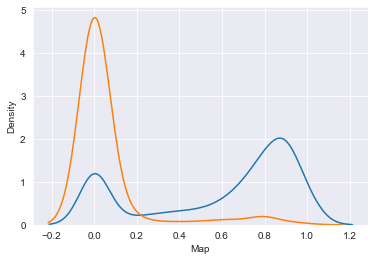

In [55]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]>0)&(test_result["Exp name"]=="basic_newlr")]


In [114]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]<den_all_boxes["Density"].quantile(0.05))&(test_result["Exp name"]=="taf_se_quantiled_best")].mean()

0.30618811881188107

In [116]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]<den_all_boxes["Density"].quantile(0.05))&(test_result["Exp name"]=="basic_newlr")].mean()

0.07658784118755224

In [117]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]>=den_all_boxes["Density"].quantile(0.05))&(test_result["Density effective min"]<den_all_boxes["Density"].quantile(0.1))&(test_result["Exp name"]=="basic_newlr")].mean()

0.17215568862275454

In [118]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]>=den_all_boxes["Density"].quantile(0.1))&(test_result["Density effective min"]<den_all_boxes["Density"].quantile(0.15))&(test_result["Exp name"]=="basic_newlr")].mean()

0.35952380952380963

In [119]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]>=den_all_boxes["Density"].quantile(0.15))&(test_result["Density effective min"]<den_all_boxes["Density"].quantile(0.2))&(test_result["Exp name"]=="basic_newlr")].mean()

0.5725988700564972

In [120]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]>=den_all_boxes["Density"].quantile(0.25))&(test_result["Density effective min"]<den_all_boxes["Density"].quantile(0.3))&(test_result["Exp name"]=="basic_newlr")].mean()

0.6733333333333333

In [121]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]>=den_all_boxes["Density"].quantile(0.35))&(test_result["Density effective min"]<den_all_boxes["Density"].quantile(0.4))&(test_result["Exp name"]=="basic_newlr")].mean()

0.6768571428571432

In [122]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]>=den_all_boxes["Density"].quantile(0.45))&(test_result["Density effective min"]<den_all_boxes["Density"].quantile(0.5))&(test_result["Exp name"]=="basic_newlr")].mean()

0.7144171779141107

In [123]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]>=den_all_boxes["Density"].quantile(0.95))&(test_result["Density effective min"]<den_all_boxes["Density"].quantile(1.0))&(test_result["Exp name"]=="basic_newlr")].mean()

0.5133333333333332

In [124]:
test_result["Map"][(test_result["Density effective max"]==test_result["Density effective min"])&(test_result["Density effective min"]>=den_all_boxes["Density"].quantile(0.75))&(test_result["Density effective min"]<den_all_boxes["Density"].quantile(0.8))&(test_result["Exp name"]=="basic_newlr")].mean()

0.6895691609977322

In [ ]:
sns.scatterplot(x="Density effective min",y="Map",data=test_result[(test_result["Density effective min"]==test_result["Density effective max"])])